In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
games = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")
recommendations = pd.read_csv("/Users/derricknguyen69/Downloads/recommendations.csv")

In [5]:
games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
recommendations.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


## Data Preprocessing

In [7]:
# Drop columns that are not useful
games = games.drop(columns = ['Reviews', 'Support email', 'Support url', 'Metacritic url', 'Header image', 'Website', 'Score rank', 'Notes', 'Publishers', 'Screenshots', 'Movies'])

In [8]:
games_descriptions = [
    'AppID, unique identifier for each app (string).',
    'Game name (string).',
    'Release date (string).',
    'Estimated owners (string, e.g.: "0 - 20000").',
    'Number of concurrent users, yesterday (int).',
    'Age required to play, 0 if it is for all audiences (int).',
    'Price in USD, 0.0 if it is free (float).',
    'Number of DLCs, 0 if you have none (int).',
    'Detailed description of the game (string).',
    'Comma-separated enumeration of supporting languages.',
    'Comma-separated enumeration of languages with audio support.',
    'Does it support Windows? (bool).',
    'Does it support Mac? (bool).',
    'Does it support Linux? (bool).',
    'Metacritic score, 0 if it has none (int).',
    'Users score, 0 if it has none (int).',
    'Positive votes (int).',
    'Negative votes (int).',
    'Number of achievements, 0 if it has none (int).',
    'User recommendations, 0 if it has none (int).',
    'Average playtime since March 2009, in minutes (int).',
    'Average playtime in the last two weeks, in minutes (int).',
    'Median playtime since March 2009, in minutes (int).',
    'Median playtime in the last two weeks, in minutes (int).',
    'Developer name (string).',
    'Game categories.',
    'Game genres.',
    'Tags.'
]

recommendations_descriptions = [
    'Native product ID on Steam.',
    'How many users found a recommendation helpful',
    'How many users found a recommendation funny',
    'Date of publishing',
    'Is the user recommending the product?',
    'How may hours played by user',
    'User anonymized ID',
    'Autogenerated ID'
]


games_info_table = pd.DataFrame({
    "Data Type": games.dtypes,
    "Null Count": games.isna().sum(),
    'Description': games_descriptions
})

recommendations_info_table = pd.DataFrame({
    "Data Type": recommendations.dtypes,
    "Null Count": recommendations.isna().sum(),
    'Description': recommendations_descriptions
})

games_info_table

,Data Type,Null Count,Description
AppID,int64,0,"AppID, unique identifier for each app (string)."
Name,object,6,Game name (string).
Release date,object,0,Release date (string).
Estimated owners,object,0,"Estimated owners (string, e.g.: ""0 - 20000"")."
Peak CCU,int64,0,"Number of concurrent users, yesterday (int)."
Required age,int64,0,"Age required to play, 0 if it is for all audie..."
Price,float64,0,"Price in USD, 0.0 if it is free (float)."
DLC count,int64,0,"Number of DLCs, 0 if you have none (int)."
About the game,object,3437,Detailed description of the game (string).
Supported languages,object,0,Comma-separated enumeration of supporting lang...


In [9]:
recommendations_info_table

,Data Type,Null Count,Description
app_id,int64,0,Native product ID on Steam.
helpful,int64,0,How many users found a recommendation helpful
funny,int64,0,How many users found a recommendation funny
date,object,0,Date of publishing
is_recommended,bool,0,Is the user recommending the product?
hours,float64,0,How may hours played by user
user_id,int64,0,User anonymized ID
review_id,int64,0,Autogenerated ID


In [10]:
# number of observations for games
games.shape

(83560, 28)

In [11]:
# number of observations for recommendations
recommendations.shape

(41154794, 8)

In [12]:
# Number of null values in games
games.isna().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3437
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     3457
Categories                     4456
Genres                         3425
Tags                        

In [13]:
# Number of null values in recommendations
recommendations.isna().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [14]:
# Drop rows with missing values in the 'About the game' column
games.dropna(subset=['About the game'], inplace=True)

In [15]:
# Variable types of games
games.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
Developers                     object
Categories                     object
Genres      

In [16]:
# Variable types of recommendations
recommendations.dtypes

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object

In [17]:
# Convert the 'Release date' column to datetime
games['Release date'] = pd.to_datetime(games['Release date'], errors='coerce')

In [18]:
# # Convert the 'Release date' column to datetime
# recommendations['date'] = pd.to_datetime(recommendations['date'], errors='coerce')

In [19]:
# Check unique values for each column in games
for i in games.columns:
    print(f'{i}: {games[i].unique()}')

AppID: [  20200  655370 1732930 ... 2308790 2669970 2530730]
Name: ['Galactic Bowling' 'Train Bandit' 'Jolt Project' ... 'UNDRESS!' 'Oculant'
 'Hentai Abigail']
Release date: <DatetimeArray>
['2008-10-21 00:00:00', '2017-10-12 00:00:00', '2021-11-17 00:00:00',
 '2020-07-23 00:00:00', '2020-02-03 00:00:00', '2021-02-26 00:00:00',
 '2022-01-09 00:00:00', '2022-05-05 00:00:00', '2020-04-02 00:00:00',
 '2014-11-11 00:00:00',
 ...
 '2023-11-06 00:00:00', '2023-10-28 00:00:00', '2023-09-30 00:00:00',
 '2023-10-01 00:00:00', '2023-11-29 00:00:00', '2023-10-08 00:00:00',
 '2023-09-10 00:00:00', '2023-09-03 00:00:00', '2023-11-26 00:00:00',
 '2023-09-17 00:00:00']
Length: 4354, dtype: datetime64[ns]
Estimated owners: ['0 - 20000' '50000 - 100000' '20000 - 50000' '200000 - 500000'
 '100000 - 200000' '2000000 - 5000000' '0 - 0' '500000 - 1000000'
 '1000000 - 2000000' '20000000 - 50000000' '5000000 - 10000000'
 '10000000 - 20000000' '50000000 - 100000000' '100000000 - 200000000']
Peak CCU: [   0  

In [20]:
# Check unique values for each column in recommendations
for i in recommendations.columns:
    print(f'{i}: {recommendations[i].unique()}')

app_id: [ 975370  304390 1085660 ... 1246250  510540 1643850]
helpful: [    0     4     2 ... 11577  5442  2277]
funny: [   0    4    2 ... 2548 2381 2035]
date: ['2022-12-12' '2017-02-17' '2019-11-17' ... '2010-10-24' '2010-11-16'
 '2010-11-04']
is_recommended: [ True False]
hours: [  36.3   11.5  336.5 ...  951.   871.4 1000. ]
user_id: [  51580    2586  253880 ... 5020742  492792 2306695]
review_id: [       0        1        2 ... 41154791 41154792 41154793]


In [21]:
# Summary stats for numerical columns excluding 'AppID' in recommendations
recommendations.drop(columns=['app_id']).describe()

,helpful,funny,hours,user_id,review_id
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,3.202567e+00,1.058071e+00,1.006022e+02,7.450576e+06,2.057740e+07
std,4.693649e+01,2.867060e+01,1.761675e+02,4.010685e+06,1.188037e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,7.800000e+00,4.287256e+06,1.028870e+07
50%,0.000000e+00,0.000000e+00,2.730000e+01,7.546446e+06,2.057740e+07
75%,0.000000e+00,0.000000e+00,9.920000e+01,1.096877e+07,3.086609e+07
max,3.621200e+04,2.810900e+04,1.000000e+03,1.430606e+07,4.115479e+07


In [22]:
games.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Categories', 'Genres',
       'Tags'],
      dtype='object')

In [23]:
recommendations.columns

Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')

In [24]:
# Summary stats for numerical columns excluding 'AppID'
games.drop(columns=['AppID']).describe()

,Release date,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,79994,80123.000000,80123.000000,80123.000000,80123.000000,80123.000000,80123.000000,8.012300e+04,80123.000000,80123.000000,8.012300e+04,80123.000000,80123.000000,80123.000000,80123.000000
mean,2020-02-29 20:10:44.088306688,141.266902,0.329106,7.492690,0.574404,3.546260,0.042297,1.016005e+03,169.071840,20.892690,8.214880e+02,110.981416,11.305630,98.980205,12.149246
min,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2018-05-08 00:00:00,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2020-10-04 00:00:00,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,8.000000e+00,2.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,2022-06-21 00:00:00,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.200000e+01,16.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2025-04-14 00:00:00,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000
std,NaN,5562.178454,2.311517,12.476732,14.139916,15.848217,1.845806,2.510164e+04,4713.395668,176.617204,1.843653e+04,1176.662920,194.539268,1556.758920,211.606178


In [25]:
# # Convert genre lists into separate columns (one-hot encoding)
# df["Genres"] = df["Genres"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
# df["Tags"] = df["Tags"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
# df["Categories"] = df["Categories"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

In [26]:
# Check for dulplicate rows
df_str = games.map(lambda x: str(x) if isinstance(x, list) else x)

duplicate_rows = df_str[df_str.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [27]:
# recommendations["hours"] = pd.to_numeric(recommendations["hours"], errors='coerce')
# recommendations["hours"] = recommendations["hours"].dropna()
# recommendations["hours"] = pd.qcut(recommendations["hours"], q=4, labels=[0, 1, 2, 3])

In [28]:
# recommendations["hours"].value_counts()

## Data Exploration

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


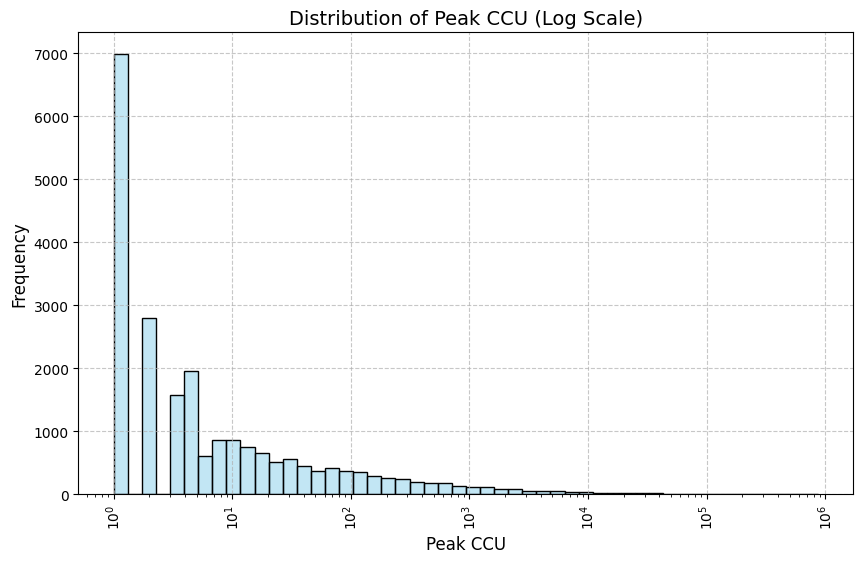

In [100]:
# 1. Histogram of Estimated Owners
plt.figure(figsize=(10, 6))
sns.histplot(games['Peak CCU'], log_scale=True, kde=True, color='skyblue', bins=50, line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel("Peak CCU", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Peak CCU (Log Scale)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

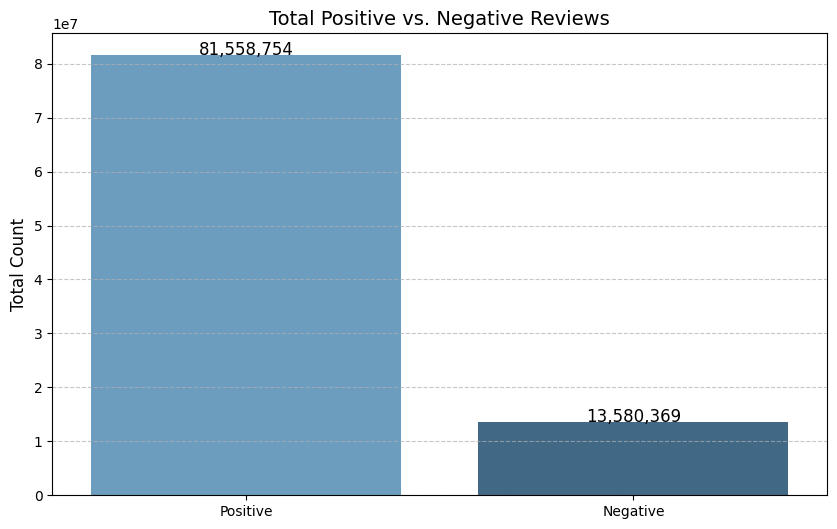

In [92]:
# 2. Bar chart of Positive vs. Negative Reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=['Positive', 'Negative'], y=[games['Positive'].sum(), games['Negative'].sum()], hue=['Positive', 'Negative'], palette="Blues_d", dodge=False, legend=False)
plt.ylabel("Total Count", fontsize=12)
plt.title("Total Positive vs. Negative Reviews", fontsize=14)
for i, count in enumerate([games['Positive'].sum(), games['Negative'].sum()]):
    plt.text(i, count + 1000, f'{count:,}', ha='center', fontsize=12, color='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

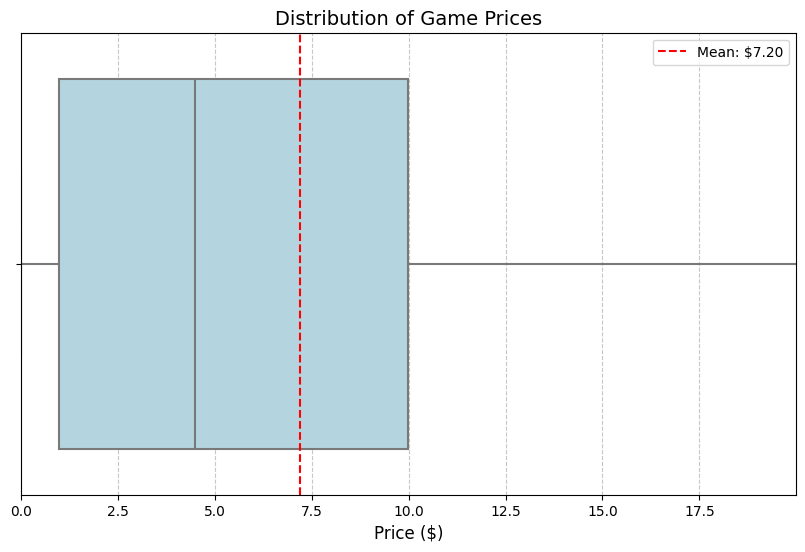

In [93]:
# 3. Boxplot of Game Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=games['Price'], color="lightblue", fliersize=5, linewidth=1.5)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
mean_price = games['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.xlabel("Price ($)", fontsize=12)
plt.title("Distribution of Game Prices", fontsize=14)
plt.xlim(0, games['Price'].quantile(0.95))
plt.legend()
plt.show()

In [ ]:
# 4. Top Genres Distribution
all_genres = [genre for sublist in games['Genres'].dropna().str.split(';') for genre in sublist]
top_genres = dict(Counter(all_genres).most_common(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()))
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Top 10 Most Common Game Genres")
plt.show()

In [76]:
# 2. Stacked Bar Chart of Positive vs. Negative Reviews
sentiment_df = games[['Positive', 'Negative']].sum().reset_index()
sentiment_df.columns = ['Sentiment', 'Count']
sentiment_df

,Sentiment,Count
0,Positive,81558754
1,Negative,13580369


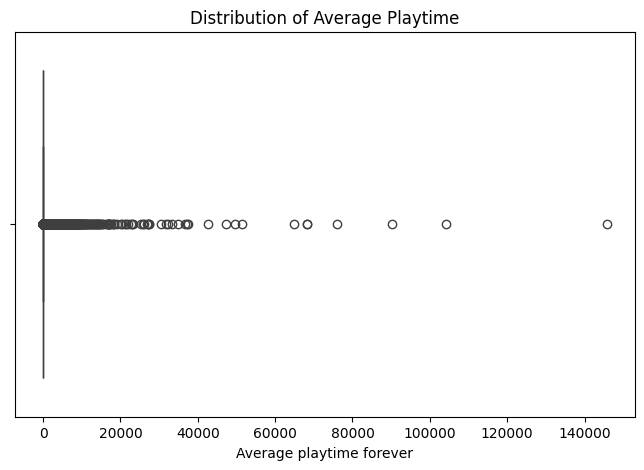

In [77]:
# Playtime Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Average playtime forever"])
plt.title("Distribution of Average Playtime")
plt.show()

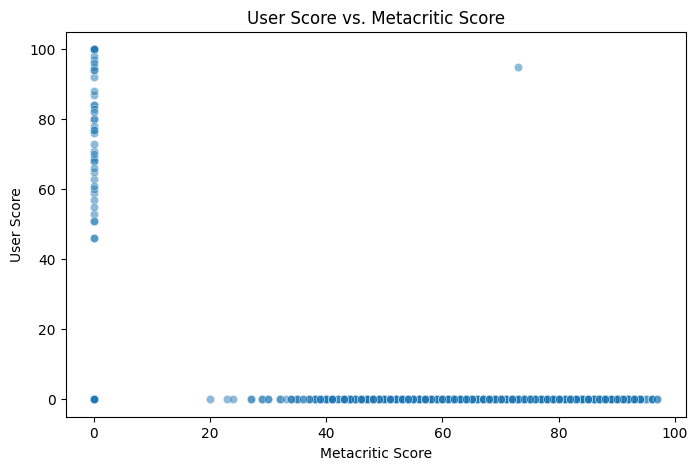

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Metacritic score"], y=df["User score"], alpha=0.5)
plt.title("User Score vs. Metacritic Score")
plt.xlabel("Metacritic Score")
plt.ylabel("User Score")
plt.show()

In [ ]:
# 2. Bar chart of Positive vs. Negative Reviews
plt.figure(figsize=(8, 5))
sns.barplot(x=['Positive', 'Negative'], y=[games['Positive'].sum(), games['Negative'].sum()])
plt.ylabel("Total Count")
plt.title("Total Positive vs. Negative Reviews")
plt.show()

# 3. Boxplot of Game Prices
plt.figure(figsize=(8, 5))
sns.boxplot(x=games['Price'])
plt.xlabel("Price ($)")
plt.title("Distribution of Game Prices")
plt.xlim(0, games['Price'].quantile(0.95))  # Remove extreme outliers
plt.show()

# 4. Top Genres Distribution
all_genres = [genre for sublist in games['Genres'].dropna().str.split(';') for genre in sublist]
top_genres = dict(Counter(all_genres).most_common(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()))
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Top 10 Most Common Game Genres")
plt.show()

(array([10276105.,        0.,        0., 10263209.,        0.,        0.,
        10285225.,        0.,        0., 10330255.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

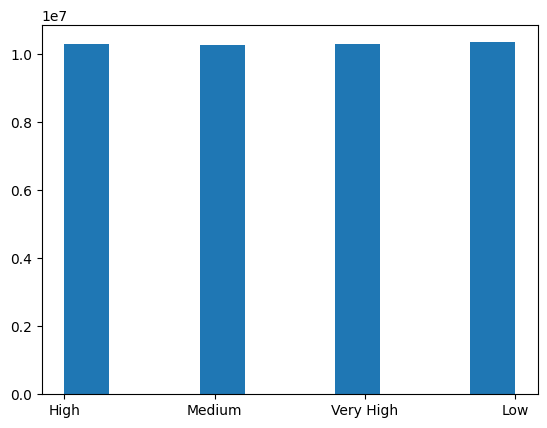

In [79]:
plt.hist(recommendations['hours'])

## Agent #1

In [30]:
# Assuming your dataset is loaded into 'sample' DataFrame
# Count the number of rows per 'user_id'
user_counts = recommendations['user_id'].value_counts()

# Get the top 100,000 users with the most rows
top_users = user_counts.head(100000).index

# Filter the dataset to only include data for the top 100,000 users
sample_recs = recommendations[recommendations['user_id'].isin(top_users)]




In [31]:
merged_df = sample_recs.merge(games, left_on='app_id', right_on='AppID', how='inner')

In [35]:
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

features = ["hours", "Genres", "Price", "is_recommended"]
df = merged_df[features]



label_enc = LabelEncoder()
onehot_enc = OneHotEncoder()

df["Genres"] = label_enc.fit_transform(df["Genres"])
df["Price"] = pd.cut(df["Price"], bins=[0, 10, 30, 60, np.inf], labels=[0, 1, 2, 3])  # Price categories

df = df.dropna()

X = df.to_numpy()

n_states = 4  # Assume 4 hidden user preference states
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)

model.fit(X)

hidden_states = model.predict(X)
df["hidden_state"] = hidden_states

def recommend_game(user_data):
    """Given a user's game data, predict their preference state and recommend a similar game."""
    state = model.predict(user_data.reshape(1, -1))
    recommended_games = df[df["hidden_state"] == state[0]]
    return recommended_games.sample(5)  # Return 5 recommended games

example_user = X[0]  # First user in dataset
recommendations = recommend_game(example_user)
print(recommendations)

y_true = df["is_recommended"]
y_pred = [1 if game in recommendations.values else 0 for game in df.values]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/var/folders/q0/6pdlfbr54gg10jp2r3g_sfhc0000gn/T/ipykernel_63900/1104376776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genres"] = label_enc.fit_transform(df["Genres"])
/var/folders/q0/6pdlfbr54gg10jp2r3g_sfhc0000gn/T/ipykernel_63900/1104376776.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = pd.cut(df["Price"], bins=[0, 10, 30, 60, np.inf], labels=[0, 1, 2, 3])  # Price categories
Model is not converging.  Current: -29272720.197758283 is not greater than -29272710.349292032. 

         hours  Genres Price  is_recommended  hidden_state
4085708    5.6    1331     1            True             0
1014823    8.5    1459     2            True             0
4087938    8.5    1557     0            True             0
5726678   29.0       4     1            True             0
5636409  171.0     131     0            True             0
Accuracy: 0.8248
Precision: 0.8247
Recall: 1.0000
F1 Score: 0.9039


In [ ]:
merged_df.columns

Index(['hours', 'Genres', 'Price', 'is_recommended', 'hidden_state'], dtype='object')

In [ ]:
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features = ["hours", "Genres", "Price", "is_recommended"]
new_merged_df = merged_df[features].dropna()

label_enc = LabelEncoder()
onehot_enc = OneHotEncoder()

new_merged_df["Genres"] = label_enc.fit_transform(new_merged_df["Genres"])
new_merged_df["Price"] = pd.qcut(new_merged_df["Price"], q=4, labels=[0, 1, 2, 3])  # 4 quantile-based bins

X = new_merged_df.to_numpy()


n_states = 4  # Assume 4 hidden user preference states
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)

model.fit(X)

hidden_states = model.predict(X)
merged_df["hidden_state"] = hidden_states

# def recommend_game(user_data):
#     """Given a user's game data, predict their preference state and recommend a similar game."""
#     state = model.predict(user_data.reshape(1, -1))
#     recommended_games = merged_df[merged_df["hidden_state"] == state[0]]
#     return recommended_games  # Return 5 recommended games

# example_user = X[0]  # First user in dataset
# recommendations = recommend_game(example_user)
# print(recommendations)

# y_true = merged_df["is_recommended"]
# y_pred = [1 if game in recommendations.values else 0 for game in merged_df.values]

# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

def generate_predictions():
    y_pred = []
    for index, row in merged_df.iterrows():
        user_data = row[["hours", "Genres", "Price"]].to_numpy()  # Features used for prediction
        state = model.predict(user_data.reshape(1, -1))  # Predict hidden state for this user
        recommended_games = merged_df[merged_df["hidden_state"] == state[0]]  # Games with the same hidden state

        # Check if the game is in the recommended list and if the game was actually recommended
        if row["AppID"] in recommended_games["AppID"].values:
            y_pred.append(1)  # Predicted recommendation
        else:
            y_pred.append(0)  # Not recommended

    return y_pred

y_true = merged_df["recommended"].to_numpy()

y_pred = generate_predictions()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

AssertionError: 